In [42]:
import itertools
import numpy as np
import pandas as pd
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15, 8)

In [2]:
# read data
df = pd.read_csv("../../data/train.tsv", sep="\t")
df.shape

(1482535, 8)

In [3]:
# remove column with na
df.dropna(inplace=True)
df.shape

(846982, 8)

In [4]:
df.head(3)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...


# Check  Distribution for Brand Name

In [6]:
len(df.brand_name.unique())

4791

In [7]:
df.brand_name.value_counts()

Nike                 53960
PINK                 53930
Victoria's Secret    47935
LuLaRoe              30873
Apple                17293
                     ...  
ComplyRight              1
Sparks                   1
Uncle Milton             1
Towncraft                1
Mel by Melissa           1
Name: brand_name, Length: 4791, dtype: int64

<AxesSubplot:ylabel='Frequency'>

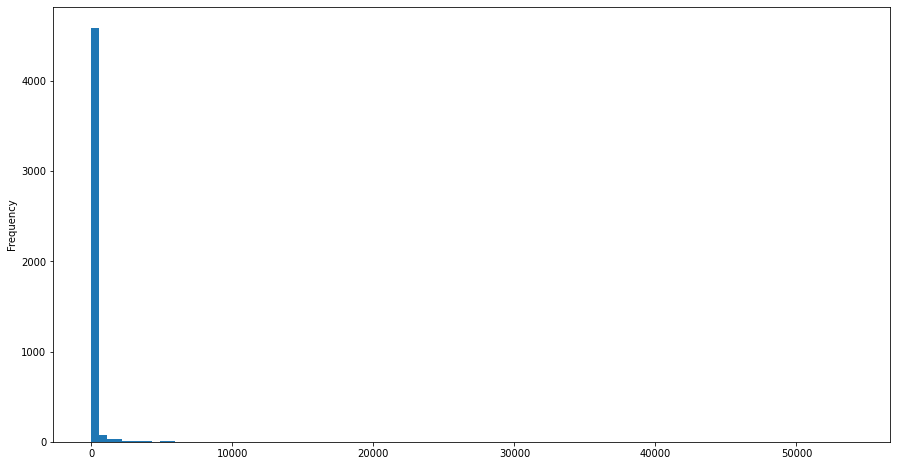

In [45]:
z = df.brand_name.value_counts()
z.plot.hist(bins = 100)

In [22]:
brand_w_few_count = z[z < 100]

<AxesSubplot:ylabel='Frequency'>

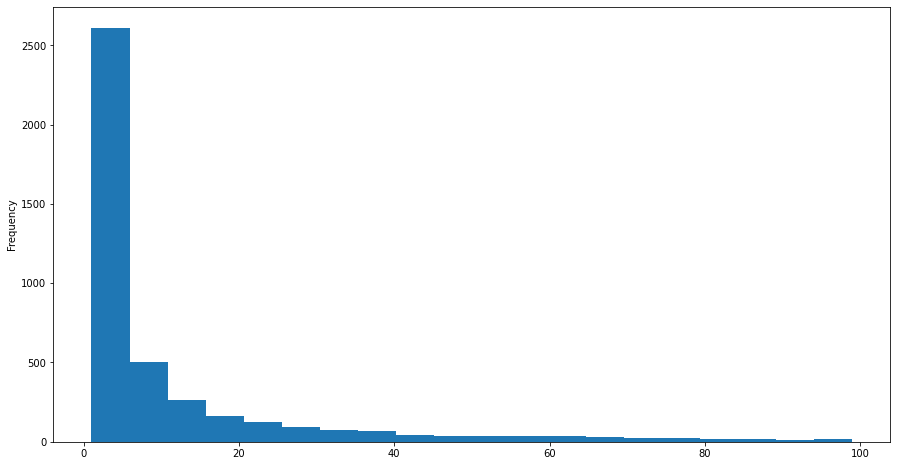

In [44]:
brand_w_few_count.plot.hist(bins = 20)

<AxesSubplot:>

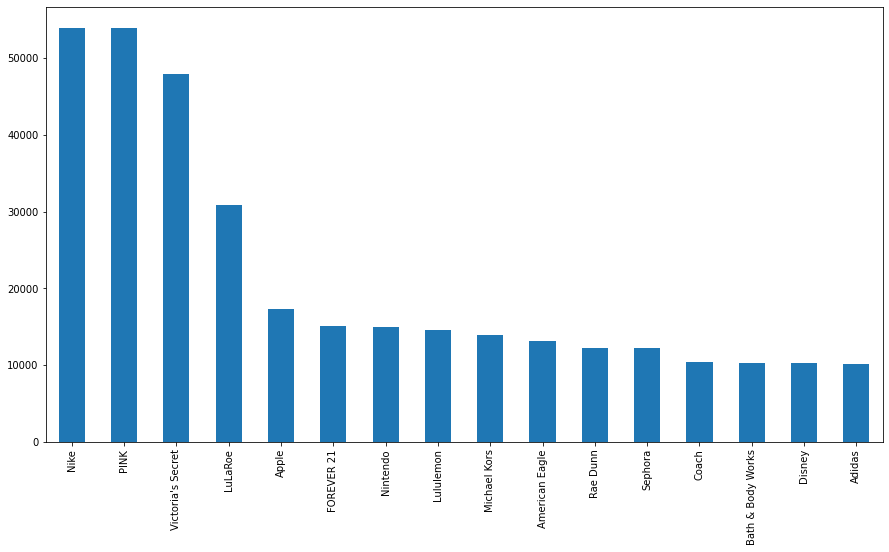

In [43]:
z[z>10000].plot(kind='bar')

In [24]:
print("number of brand with only one item: ", len(z[z==1]))

number of brand with only one item:  1235


In [28]:
print("number of brand with less than ten item: ", len(z[z<10]))

number of brand with less than ten item:  3041


In [29]:
print("number of brand with more than one hundred item: ", len(z[z>100]))

number of brand with more than one hundred item:  565


# Check Distribution for Category Name

In [32]:
def create_new_categories(x):
    try:
        categories = x.split('/')
        if len(categories) == 3:
            return pd.Series({'c1':categories[0].lower().strip(), 
                              'c2':categories[1].lower().strip(),
                              'c3':categories[2].lower().strip()})
        return pd.Series({'c1': None, 'c2':None, 'c3': None})
    except:
        return pd.Series({'c1': None, 'c2':None, 'c3': None})

In [33]:
new_df = pd.concat([df[['train_id', 'name', 'item_condition_id', 'brand_name','price', 'shipping', 'item_description']], 
                    df.category_name.apply(create_new_categories)], axis=1)

In [35]:
new_df.shape

(846982, 10)

## Check Main Category - C1

<AxesSubplot:>

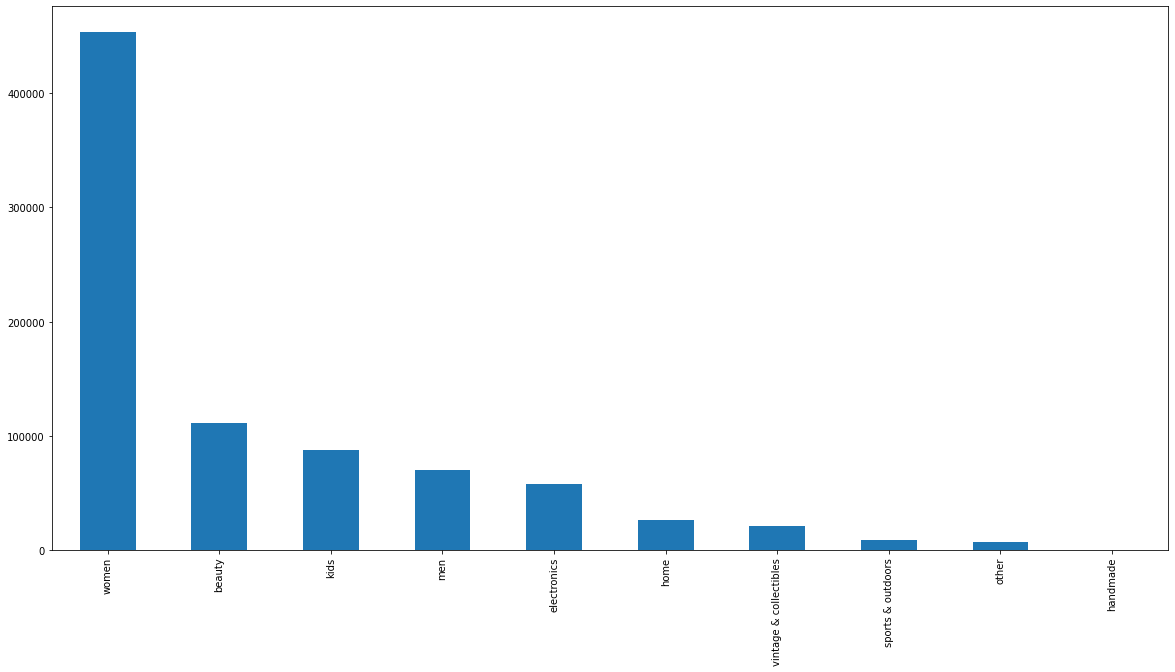

In [41]:
c1 = new_df.c1.value_counts()
c1.plot(kind='bar')

In [46]:
c2 = new_df.c2.value_counts()
len(c2)

104

<AxesSubplot:>

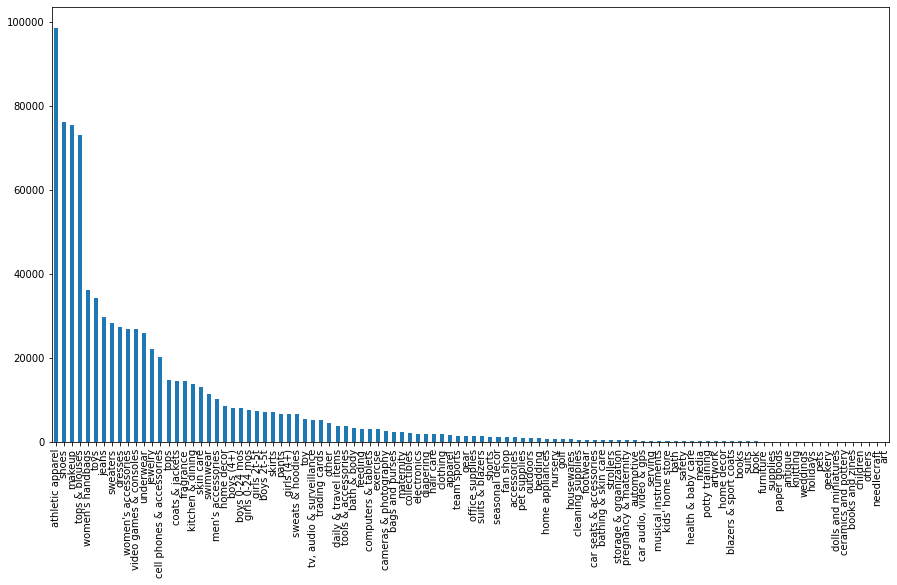

In [47]:
c2.plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

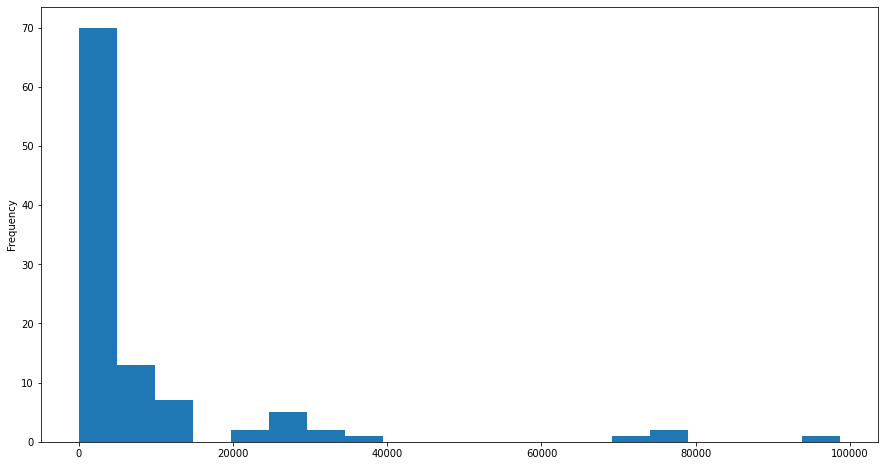

In [48]:
c2.plot.hist(bins = 20)

In [50]:
c3 = new_df.c3.value_counts()
len(c3)

663

<AxesSubplot:ylabel='Frequency'>

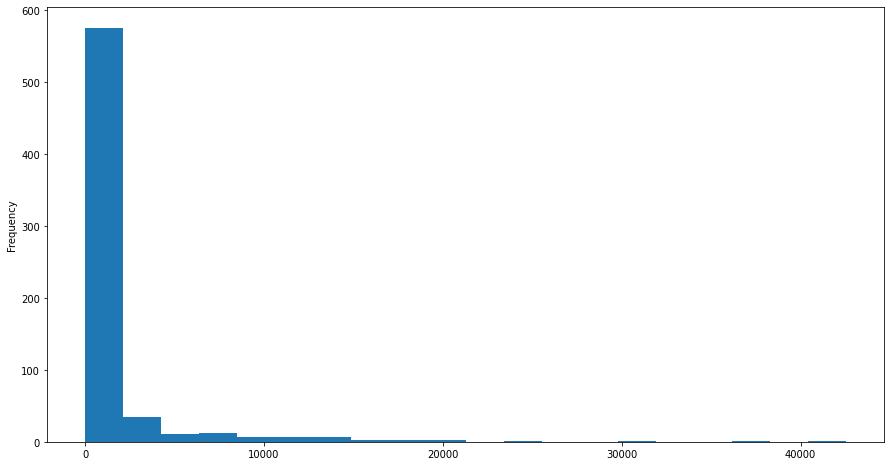

In [51]:
c3.plot.hist(bins = 20)

In [55]:
print("number of c3 with more than one hundred item: ", len(c3[c3>100]))

number of c3 with more than one hundred item:  295


<AxesSubplot:ylabel='Frequency'>

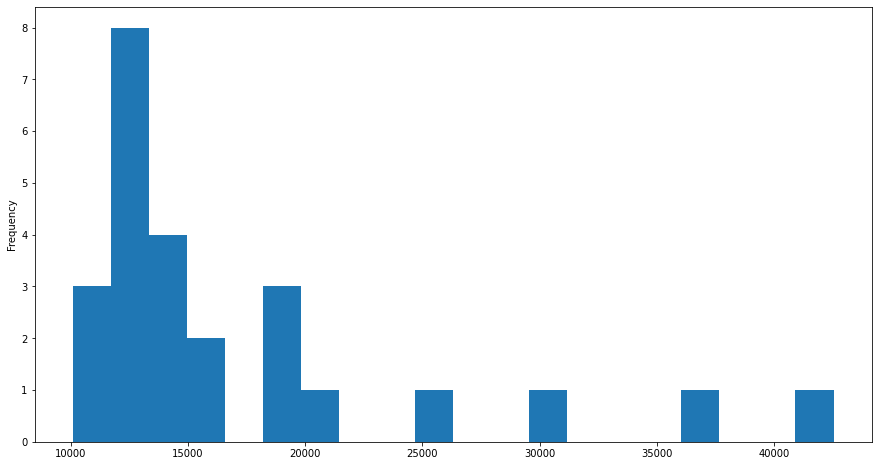

In [56]:
c3[c3>10000].plot.hist(bins = 20)

<AxesSubplot:>

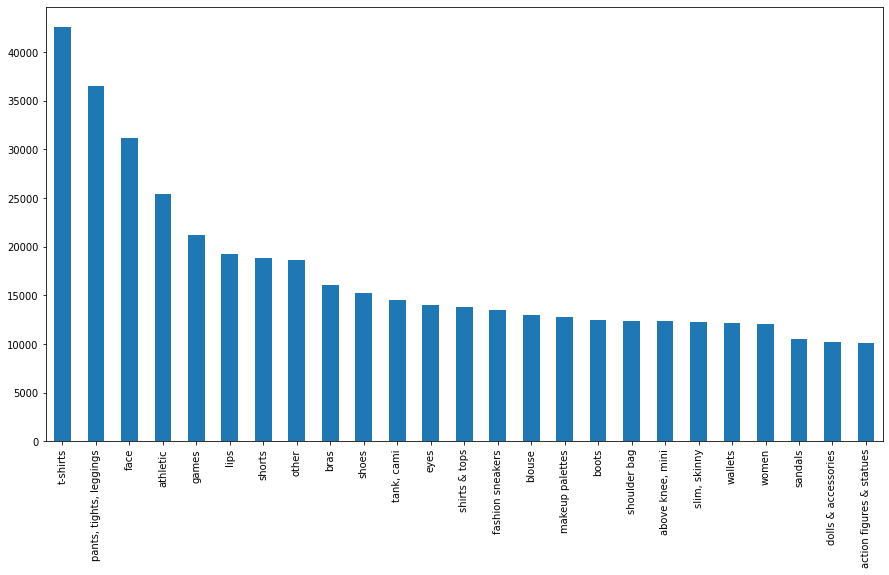

In [57]:
c3[c3>10000].plot(kind='bar')

# Check Distribution for Price Name

In [60]:
df.price.describe()

count    846982.000000
mean         30.917965
std          44.742851
min           0.000000
25%          12.000000
50%          20.000000
75%          34.000000
max        2009.000000
Name: price, dtype: float64

<AxesSubplot:ylabel='Frequency'>

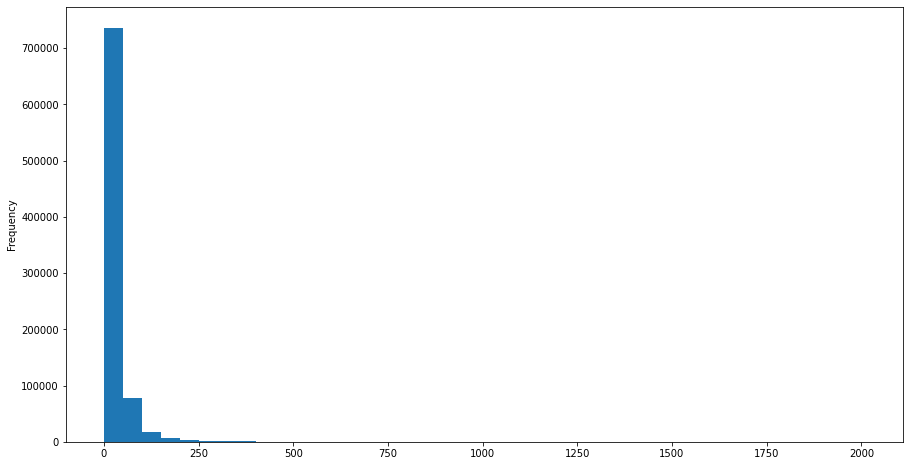

In [58]:
df.price.plot.hist(bins=40)

<AxesSubplot:ylabel='Frequency'>

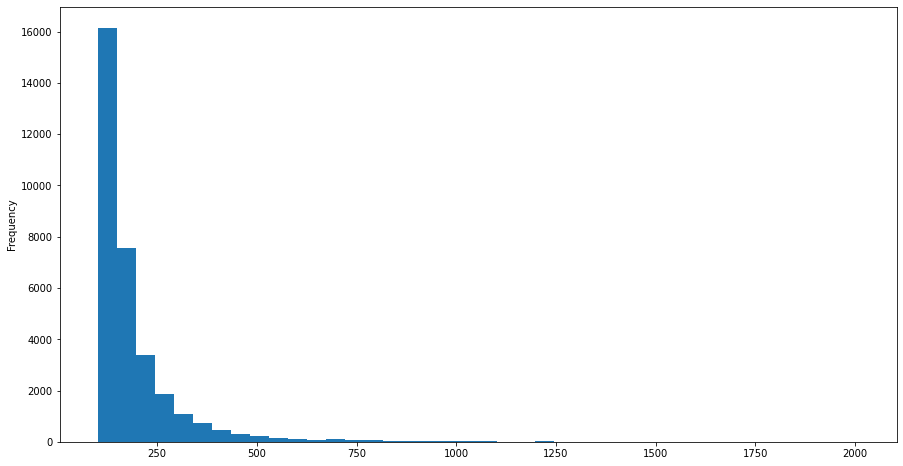

In [59]:
df.price[df.price>100].plot.hist(bins=40)

<AxesSubplot:ylabel='Frequency'>

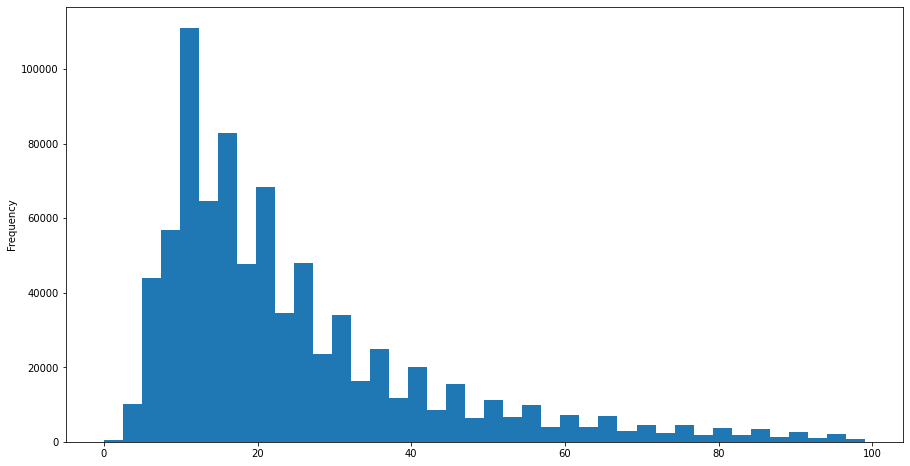

In [61]:
df.price[df.price<100].plot.hist(bins=40)